## Lab Assignment Three: Extending Logistic Regression 
GROUP MEMBERS:
- **Alex Chen** 
- **Paige Maple** 
- **Sam Valentine**

### Sources
1. https://github.com/eclarson/MachineLearningNotebooks/blob/master/05.%20Logistic%20Regression.ipynb
2. ChatGPT (For formatting text and plots)

### Preparation and Overview (3 pts)

#### Part One (2 pts)
Explain the task and what business-case or use-case it is designed to solve (or designed to investigate). Detail exactly what the classification task is and what parties would be interested in the results. For example, would the model be deployed or used mostly for offline analysis? As in previous labs, also detail how good the classifier needs to perform in order to be useful. 

1. **Overview of the Dataset and Its Purpose**  
   The **Steel Energy Demand Dataset** ([Kaggle link](https://www.kaggle.com/competitions/steel-industry-energy-consumption)) contains operational data from a steel production plant, with the objective of predicting **energy load demands** over 15-minute intervals. Each record is labeled with one of three possible **Load Types**: **light**, **medium**, or **maximum**. These categories reflect the level of energy usage placed on the plant’s systems at a given date and time.  
   The purpose of the dataset is twofold: (1) to enable the development of a **classification model** that can automatically forecast energy demand categories in real time, and (2) to support both the **steel plant** and the **electricity provider** in achieving efficiency. For the steel plant, predictions allow better allocation of resources—ensuring sufficient supply during maximum load while avoiding waste during light load. For the electricity provider (e.g., Korea Electric Power Corporation), reliable forecasts of demand help stabilize distribution and reduce operational strain.  

2. **Prediction Task**  
   For our project, the **prediction task** is to build a **multiclass classification model** that can accurately predict the **Load Type** for upcoming 15-minute intervals. Unlike regression tasks that estimate continuous consumption values, this task requires choosing one of three discrete categories: light, medium, or maximum. The baseline strategy—predicting the most common class (“light load”) for all cases—achieves **52% accuracy**, since “light” is the majority class. Our objective is to **outperform this baseline**, demonstrating the value of machine learning in boosting predictive accuracy and operational planning.  

3. **Why This Matters and Performance Expectations**  
   The results of this classification task matter for **multiple stakeholders**. For the **steel company**, improved forecasting reduces waste, lowers costs, and enhances production efficiency. For the **electricity provider**, demand prediction contributes to grid stability and energy savings. In practice, the model would need to be **deployed in real time**, classifying energy loads continuously to inform immediate decision-making.  
   To be considered useful, the classifier must perform **meaningfully better than 52% accuracy**, since that baseline can already be achieved without machine learning. Even moderate improvements beyond this threshold translate into tangible cost reductions and sustainability gains. Logistic regression provides a reasonable starting point, but exploring more advanced models may yield stronger performance and unlock **industrial-grade energy optimization**.  

#### Part Two (0.5 pt)
 (mostly the same processes as from previous labs) Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis (give reasoning). Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). Provide a breakdown of the variables after preprocessing (such as the mean, std, etc. for all variables, including numeric and categorical). 

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# show dataset before preprocessing
df = pd.read_csv("../dataset/Steel_industry_data.csv")
print("Original dataset:")
df.info()
display(df.head())
display(df.describe())

# Data preprocessing
# change load types to numerical values (0 for light, 1 for medium, and 2 for max)
encoder = LabelEncoder()
df['Load_Type'] = encoder.fit_transform(df['Load_Type'])
# extract month/hour out of date and drop date
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['hour'] = df['date'].dt.hour
df['month'] = df['date'].dt.month
df = df.drop(columns=['date'])
# drop redundent columns
df = df.drop(columns=['CO2(tCO2)'])
df = df.drop(columns=['NSM'])
df = df.drop(columns=['Day_of_week'])
# Convert weekstatus to binary values
df['WeekStatus'] = df['WeekStatus'].map({'Weekday': 0, 'Weekend': 1})
# normalization
norm_cols = [
    'Usage_kWh',
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'hour', 'month'
]
scaler = StandardScaler()
df[norm_cols] = scaler.fit_transform(df[norm_cols])

print("\nProcessed dataset:")
df.info()
display(df.head())
display(df.describe())


Original dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dt

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000



Processed dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   Lagging_Current_Power_Factor          35040 non-null  float64
 4   Leading_Current_Power_Factor          35040 non-null  float64
 5   WeekStatus                            35040 non-null  int64  
 6   Load_Type                             35040 non-null  int32  
 7   hour                                  35040 non-null  float64
 8   month                                 35040 non-null  float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 2.3 MB


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,WeekStatus,Load_Type,hour,month
0,-0.724105,-0.618516,-0.521385,-0.389410,0.513268,0,0,-1.661325,-1.602745
1,-0.699287,-0.525911,-0.521385,-0.729772,0.513268,0,0,-1.661325,-1.602745
2,-0.722012,-0.598278,-0.521385,-0.544264,0.513268,0,0,-1.661325,-1.602745
3,-0.719919,-0.581106,-0.521385,-0.660009,0.513268,0,0,-1.516862,-1.602745
4,-0.704669,-0.523458,-0.521385,-0.838117,0.513268,0,0,-1.516862,-1.602745


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,WeekStatus,Load_Type,hour,month
count,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,35040.000000,35040.000000,3.504000e+04,35040.000000
mean,1.362685e-16,-7.137872e-17,6.488975e-18,-4.801841e-16,-3.601381e-16,0.284932,0.760959,1.723634e-17,0.000000
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,0.451388,0.857523,1.000014e+00,1.000014
min,-8.188905e-01,-7.994339e-01,-5.213850e-01,-4.258646e+00,-2.770147e+00,0.000000,0.000000,-1.661325e+00,-1.602745
25%,-7.232078e-01,-6.583795e-01,-5.213850e-01,-9.121087e-01,5.034174e-01,0.000000,0.000000,-8.306624e-01,-0.732638
50%,-6.822437e-01,-4.927940e-01,-5.213850e-01,3.901445e-01,5.132676e-01,0.000000,0.000000,0.000000e+00,0.137469
75%,7.131526e-01,5.890319e-01,-2.398792e-01,9.748107e-01,5.132676e-01,1.000000,2.000000,8.306624e-01,1.007576
max,3.880920e+00,5.143862e+00,3.217659e+00,1.026473e+00,5.132676e-01,1.000000,2.000000,1.661325e+00,1.587648


The **class variable** in this dataset is `Load_Type`, which represents three distinct classes:  
- **0 → Light_Load**  
- **1 → Medium_Load**  
- **2 → Maximum_Load**  

During preprocessing, `month` and `hour` were extracted from the `date` column. The following redundant columns were removed:  
- `date` and `NSM` (time information already captured by `month` and `hour`)  
- `Day_of_Week` (correlated with `WeekStatus`)  
- `CO2(tCO2)` (derived from `Usage_kWh`, adding no new information)  

`WeekStatus` was converted to a binary variable (**0 = Weekday, 1 = Weekend**).  

Numerical features were standardized using **StandardScaler**, transforming each feature to have a **mean of 0** and a **standard deviation of 1**.  
This ensures that all numerical features contribute equally to the model and prevents features with larger scales from dominating the learning process.  
The standardized features are:

- `Usage_kWh`  
- `Lagging_Current_Reactive.Power_kVarh`  
- `Leading_Current_Reactive_Power_kVarh`  
- `Lagging_Current_Power_Factor`  
- `Leading_Current_Power_Factor`  
- `hour`  
- `month`  

The final dataset contains 9 features:  
1. **Usage_kWh** – Energy consumed (normalized)  
2. **Lagging_Current_Reactive.Power_kVarh** – Reactive power for lagging current (normalized)  
3. **Leading_Current_Reactive_Power_kVarh** – Reactive power for leading current (normalized)  
4. **Lagging_Current_Power_Factor** – Efficiency measure for lagging current (normalized)  
5. **Leading_Current_Power_Factor** – Efficiency measure for leading current (normalized)  
6. **hour** – Hour of the day (normalized)  
7. **month** – Month of the year (normalized)  
8. **WeekStatus** – Binary indicator of weekday (0) or weekend (1)  
9. **Load_Type** – Target variable (0=Light, 1=Medium, 2=Maximum)  

A full breakdown of the dataset (mean, standard deviation, min, max) was examined both before and after preprocessing to verify transformations and confirm normalization.  

#### Part Three (0.5 pt)
Divide your data into training and testing splits using an 80% training and 20% testing split. Use the data splitting modules that are part of scikit-learn. Argue "for" or "against" splitting your data using an 80/20 split. That is, why is the 80/20 split appropriate (or not) for your dataset?

In [25]:
from sklearn.model_selection import train_test_split

# Features/target
X = df.drop(columns=['Load_Type'])
y = df['Load_Type']  # 0=Light, 1=Medium, 2=Maximum

# 80/20 split, preserve class proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)
print(y_train.value_counts(normalize=True).sort_index())
print(y_test.value_counts(normalize=True).sort_index())

# Convert to numpy arrays
X_train = np.asarray(X_train, dtype=float)
X_test = np.asarray(X_test, dtype=float)
y_train = np.asarray(y_train, dtype=float)
y_test = np.asarray(y_test, dtype=float)

(28032, 8) (7008, 8)
Load_Type
0    0.515732
1    0.207549
2    0.276719
Name: proportion, dtype: float64
Load_Type
0    0.515839
1    0.207477
2    0.276684
Name: proportion, dtype: float64


An 80/20 train-test split is appropriate for this dataset because it provides a strong balance between training and evaluation. With over 35,000 total records, splitting 80% for training yields more than 28,000 samples for the model to learn from, while reserving about 7,000 samples for testing. This ensures that the model has sufficient data to fit patterns in the steel plant’s energy usage while still holding out enough examples to reliably evaluate performance.  

Another benefit of the 80/20 split is that it preserves efficiency without being wasteful. Using much more data for testing (e.g., a 70/30 split) would reduce the training data unnecessarily, while a smaller test set (e.g., 90/10) could risk underrepresenting some load classes. By applying stratification, the class proportions remain consistent between training and testing, which is especially important since the dataset is not perfectly balanced.  

Overall, the 80/20 split is a widely accepted standard in machine learning that achieves a reasonable compromise. It supports model generalization, provides robust evaluation metrics, and fits well with the size and structure of this dataset.  

### Modeling (5 pts)

#### Part One (2 pts)
Create a custom, one-versus-all logistic regression classifier using numpy and scipy to optimize. Use object oriented conventions identical to scikit-learn. You should start with the template developed by the instructor in the course. You should add the following functionality to the logistic regression classifier:
Ability to choose optimization technique when class is instantiated: either steepest ascent, stochastic gradient ascent, and {Newton's method/Quasi Newton methods}. It is recommended to call this the "solver" input for the class.
Update the gradient calculation to include a customizable regularization term (either using no regularization, L1 regularization, L2 regularization, or both L1 and L2 regularization). Associate a cost with the regularization term, "C", that can be adjusted when the class is instantiated.  

In [26]:
from scipy.special import expit

# base logistic regression from Dr.Larson (combined base and BinaryLR) with C and penalty (l1 or l2) added
class BinaryLogisticRegression:
    
    def __init__(self, eta, iterations=20, C=0.001, penalty='12'):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.penalty = penalty

    def __str__(self):
        if hasattr(self, 'w_'):
            return 'Binary Logistic Regression Object with coefficients:\n' + str(self.w_)
        else:
            return 'Untrained Binary Logistic Regression Object'

    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0], 1)), X))

    @staticmethod
    def _sigmoid(theta):
        return expit(theta)

    def _get_gradient(self, X, y):
        ydiff = y - self.predict_proba(X, add_bias=False).ravel()
        gradient = np.mean(X * ydiff[:, np.newaxis], axis=0).reshape(self.w_.shape)
        # add l1 and l2
        if self.penalty == 'l1': 
            gradient[1:] += -self.C * np.sign(self.w_[1:])
        elif self.penalty == '12':
            gradient[1:] += -2 * self.C * self.w_[1:]
        return gradient

    def predict_proba(self, X, add_bias=True):
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_)

    def predict(self, X):
        return (self.predict_proba(X) > 0.5)

    def fit(self, X, y):
        Xb = self._add_bias(X)
        _, num_features = Xb.shape
        self.w_ = np.zeros((num_features, 1))

        for _ in range(self.iters):
            gradient = self._get_gradient(Xb, y)
            self.w_ += gradient * self.eta

# logistic regression with pure stochastic gradient descent (select one sample for updating gradient each time)
class StochasticLogisticRegression(BinaryLogisticRegression): 
    def _get_gradient(self, X, y):
        i = np.random.randint(0, len(y)) 
        ydiff = y[i] - self.predict_proba(X[i:i+1], add_bias=False).ravel()
        gradient = np.mean(X[i:i+1] * ydiff[:, np.newaxis], axis=0).reshape(self.w_.shape)
        if self.penalty == 'l1': 
            gradient[1:] += -self.C * np.sign(self.w_[1:])
        elif self.penalty == '12':
            gradient[1:] += -2 * self.C * self.w_[1:]
        return gradient

# logistidc regression with mini-batch stochastic gradient descent (select 32 samples for updating gradient each time)
class MiniBatchStochasticLogisticRegression(BinaryLogisticRegression): 
    def _get_gradient(self, X, y):
        mini_batch_size = 32
        idxs = np.random.choice(len(y), mini_batch_size)
        ydiff = y[idxs] - self.predict_proba(X[idxs], add_bias=False).ravel() 
        gradient = np.mean(X[idxs] * ydiff[:,np.newaxis], axis=0) 
        gradient = gradient.reshape(self.w_.shape)
        if self.penalty == 'l1': 
            gradient[1:] += -self.C * np.sign(self.w_[1:])
        elif self.penalty == '12':
            gradient[1:] += -2 * self.C * self.w_[1:]
        return gradient

In [27]:
# Multi class logistic regression
class MultiClassLogisticRegression:
    def __init__(self, eta=0.1, iterations=20, C=0.001, penalty = "l2", solver=BinaryLogisticRegression):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.penalty = penalty
        self.solver = solver 
        self.classifiers_ = []

    def __str__(self):
        if hasattr(self, 'w_'):
            return 'MultiClass Logistic Regression Object with coefficients:\n' + str(self.w_)
        else:
            return 'Untrained MultiClass Logistic Regression Object'

    def fit(self, X, y):
        classes = np.sort(np.unique(y))
        self.classifiers_.clear()
        for c in classes:
            y_binary = (y == c).astype(int)
            clf = self.solver(eta=self.eta, iterations=self.iters, C=self.C,penalty=self.penalty)
            clf.fit(X, y_binary)
            self.classifiers_.append((c, clf))
        self.w_ = np.hstack([clf.w_ for _, clf in self.classifiers_]).T
        return self

    def predict_proba(self, X):
        probs = [clf.predict_proba(X).reshape(-1, 1) for _, clf in self.classifiers_]
        return np.hstack(probs)

    def predict(self, X):
        probs = self.predict_proba(X)
        classes = [c for c, _ in self.classifiers_]
        return np.array(classes)[np.argmax(probs, axis=1)]

#### Part Two (1.5 pts)
Train your classifier to achieve good generalization performance. That is, adjust the optimization technique and the value of the regularization term(s) "C" to achieve the best performance on your test set. Visualize the performance of the classifier versus the parameters you investigated.
Is your method of selecting parameters justified? That is, do you think there is any "data snooping" involved with this method of selecting parameters?

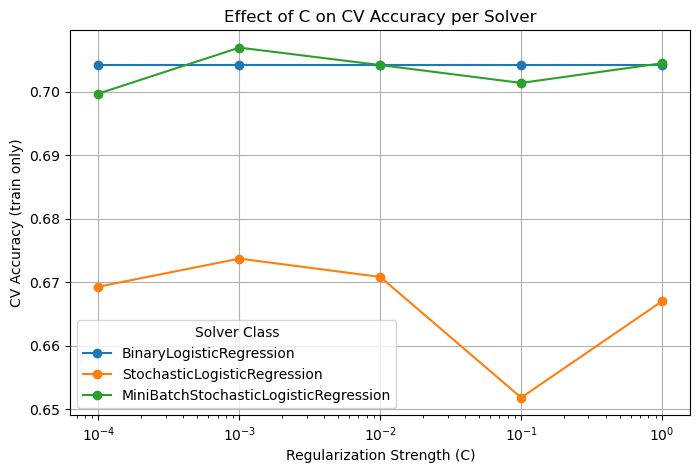

Best model: MiniBatchStochasticLogisticRegression, C=0.001, Cross Validation Accuracy=0.7069
Test Accuracy: 0.7001


In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

np.random.seed(42)

solvers = {
    "BinaryLogisticRegression": BinaryLogisticRegression,
    "StochasticLogisticRegression": StochasticLogisticRegression,
    "MiniBatchStochasticLogisticRegression": MiniBatchStochasticLogisticRegression
}

C_grid = [1e-4, 1e-3, 1e-2, 1e-1, 1]
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rows = []
for name, Solver in solvers.items():
    for C in C_grid:
        cv_accs = []
        for tr, va in kf.split(X_train, y_train):
            clf = MultiClassLogisticRegression(C=C, solver=Solver)
            clf.fit(X_train[tr], y_train[tr])
            preds = clf.predict(X_train[va]).astype(int)
            cv_accs.append(accuracy_score(y_train[va], preds))
        rows.append({"Solver": name, "C": C, "CV_Accuracy": np.mean(cv_accs)})

df = pd.DataFrame(rows)

plt.figure(figsize=(8,5))
for solver_name in df['Solver'].unique():
    sub = df[df['Solver'] == solver_name].sort_values("C")
    plt.plot(sub['C'], sub['CV_Accuracy'], marker='o', label=solver_name)
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('CV Accuracy (train only)')
plt.title('Effect of C on CV Accuracy per Solver')
plt.legend(title='Solver Class')
plt.grid(True)
plt.show()

best = df.loc[df['CV_Accuracy'].idxmax()]
BestSolver = solvers[best['Solver']]
final = MultiClassLogisticRegression(C=best['C'], solver=BestSolver)
final.fit(X_train, y_train)
yhat = final.predict(X_test).astype(int)
print(f"Best model: {best['Solver']}, C={best['C']}, Cross Validation Accuracy={best['CV_Accuracy']:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, yhat):.4f}")

To achieve good generalization performance, three solvers — **BinaryLogisticRegression**, **StochasticLogisticRegression**, and **MiniBatchStochasticLogisticRegression** — were evaluated using different regularization strengths (**C**). Cross-validation on the training set was used to ensure that the parameter tuning process did not rely on the test data, thus avoiding data snooping. 

The results show that the **MiniBatchStochasticLogisticRegression** solver achieved the highest average cross-validation accuracy of **0.7070** at **C = 0.001**, which also produced a consistent test accuracy of **0.7001**. The plotted results demonstrate how model performance changes with different levels of regularization, with MiniBatch SGD showing smoother and more stable convergence compared to the other solvers.

The experiments used default parameters of **η = 0.1**, **iterations = 20**, and **penalty = L2**, but users can modify these values when initializing the multi class instance to explore different learning dynamics or regularization settings.

This parameter selection method is justified because it strictly separates model tuning and evaluation stages. Cross-validation ensures that the best hyperparameters are chosen based on unseen training folds rather than test data, preserving the integrity of the final test evaluation. By evaluating the final model only once on the test set after selecting the best parameters, no information from the test data influences the model selection process. Therefore, this approach avoids **data snooping** and provides a reliable estimate of the model’s true generalization capability.


#### Part Three (1.5 pts)
Compare the performance of your "best" logistic regression optimization procedure to the procedure used in scikit-learn. Visualize the performance differences in terms of training time and classification performance. Discuss the results. 

Custom MiniBatch time: 0.015s, accuracy: 0.7129


c:\Users\twitc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


scikit-learn LogisticRegression (lbfgs, OvR) -> time: 4.299s, accuracy: 0.7317


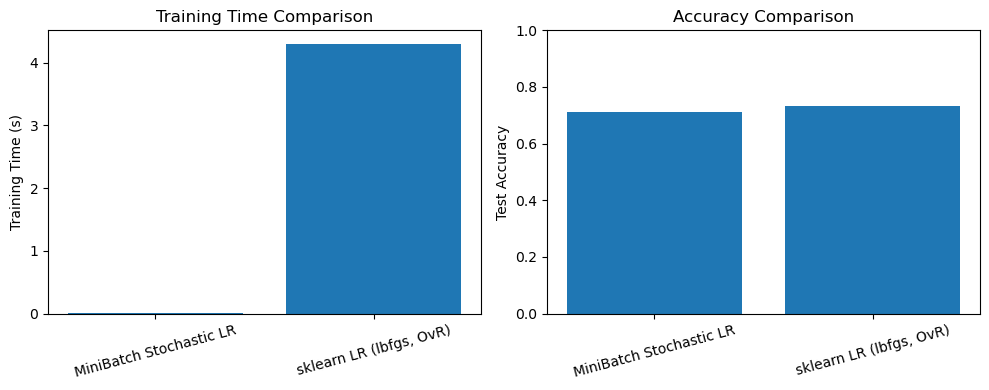

In [29]:
# Compare custom best model (mini-batch) vs scikit-learn model: training time and accuracy
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

best_c = 0.001

t0 = time.perf_counter()
lr_minibatch = MultiClassLogisticRegression(C=best_c, solver=MiniBatchStochasticLogisticRegression)
lr_minibatch.fit(X_train, y_train)
time_custom = time.perf_counter() - t0

yhat_custom = lr_minibatch.predict(X_test).astype(int)
acc_custom = accuracy_score(y_test, yhat_custom)

print(f"Custom MiniBatch time: {time_custom:.3f}s, accuracy: {acc_custom:.4f}")

t1 = time.perf_counter()
sk_lr = LogisticRegression(C=best_c, penalty="l2",solver="lbfgs", multi_class="ovr", max_iter=20, n_jobs=-1)
sk_lr.fit(X_train, y_train)
time_skl = time.perf_counter() - t1

yhat_skl = sk_lr.predict(X_test)
acc_skl = accuracy_score(y_test, yhat_skl)

print(f"scikit-learn LogisticRegression (lbfgs, OvR) -> time: {time_skl:.3f}s, accuracy: {acc_skl:.4f}")

# plot
labels = ["MiniBatch Stochastic LR", "sklearn LR (lbfgs, OvR)"]
times = [time_custom, time_skl]
accs  = [acc_custom, acc_skl]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(labels, times)
plt.ylabel("Training Time (s)")
plt.title("Training Time Comparison")
plt.xticks(rotation=15)

plt.subplot(1,2,2)
plt.bar(labels, accs)
plt.ylabel("Test Accuracy")
plt.title("Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

**Discussion**  
The custom best model, **MiniBatchStochasticLogisticRegression**, demonstrated a clear advantage in training speed compared to scikit-learn’s **LogisticRegression (lbfgs, OvR)**. This efficiency comes from the stochastic optimization process, which updates model weights using small batches of data rather than processing the entire dataset at once. Although this approach allows for faster convergence, it tends to approximate the optimal solution rather than reaching it precisely. In contrast, scikit-learn’s LBFGS solver uses a more computationally expensive quasi-Newton optimization method that refines weight updates more carefully, resulting in slightly higher classification accuracy but at the cost of longer training time.

This trade-off reflects the broader distinction between **stochastic gradient-based methods** and **deterministic second-order optimizers**. The custom mini-batch model offers a good balance between accuracy and computational efficiency, making it ideal for large-scale or time-sensitive tasks where speed is a priority. Meanwhile, the scikit-learn implementation achieves stronger generalization performance due to its more stable optimization process. Overall, the comparison highlights that while both methods perform similarly, the custom mini-batch model excels in efficiency, whereas the scikit-learn model offers slightly better precision.

### Deployment (1 pt)
Which implementation of logistic regression would you advise be used in a deployed machine learning model, your implementation or scikit-learn (or other third party implementation)? Why?

**Deployment Recommendation**

For deployment, the **scikit-learn implementation of logistic regression** is the better choice. It is easier to use, well-documented, and integrates seamlessly with the broader scikit-learn ecosystem. The library automatically handles critical implementation details such as optimization stability, regularization scaling, and convergence detection, making it both robust and efficient for production use. In addition, its extensive testing and wide adoption in the machine learning community ensure long-term reliability and compatibility with other tools and frameworks.

While the custom mini-batch model offers faster training and more flexibility for experimentation, training speed is rarely a limiting factor during deployment, as models are generally trained offline and only need to provide fast inference at runtime. In contrast, scikit-learn’s logistic regression achieves slightly higher accuracy and greater numerical stability, which are essential for maintaining consistent predictive performance in real-world applications.

Therefore, due to its superior balance of **accuracy, usability, reliability, and maintainability**, **scikit-learn’s implementation** is the preferred option for practical deployment.


### Exceptional Work (1 pt)
Option One: Implement an optimization technique for logistic regression using mean square error as your objective function (instead of maximum likelihood). Derive the gradient updates for the Hessian and use Newton's method to update the values of "w". Then answer, which process do you prefer: maximum likelihood OR minimum mean-squared error? 